## DT vs. SVM
* Zweck: Berechnen der Resultate der Section "Comparison with Decision Trees" aus dem Kapitel Results. Das erste Script zeigt die Laufzeitunterschiede und das Zweite die Präzisionsunterschiede in der Klassifikation.

### Laufzeitunterschiede DT vs. SVM
* Matrix: Teile einer Klassifikationsmatrix auf aktuellem Stand "current" des mozilla-central Repository
* Features: Includes
* Modell: Support Vector Machine Classifier, Decision Tree Classifier

#### Setup
* Matrix: Die Matrix wird bei jedem Schritt um 10% vergrössert (10%-100%)
* Training-Set/Test-Set: Stratified sampling auf der Matrix (2/3 : 1/3)

#### Results
Das Skript trainiert je einen SVM- und einen DT-Classifier mit fortlaufend grösseren Training-Sets und berechnet anschliessend Precision und Recall. Die Zeit, die für das Trainieren benötigt wird, ist im Plot dargestellt.
* Resultat Plot: Zeit für das trainieren eines SVM- bzw. DT-Classifiers.

DT Calculation 1/20
DT Calculation 2/20
DT Calculation 3/20
DT Calculation 4/20
DT Calculation 5/20
DT Calculation 6/20
DT Calculation 7/20
DT Calculation 8/20
DT Calculation 9/20
DT Calculation 10/20
DT Calculation 11/20
DT Calculation 12/20
DT Calculation 13/20
DT Calculation 14/20
DT Calculation 15/20
DT Calculation 16/20
DT Calculation 17/20
DT Calculation 18/20
DT Calculation 19/20
DT Calculation 20/20
LinearSVC Calculation 1/20
LinearSVC Calculation 2/20
LinearSVC Calculation 3/20
LinearSVC Calculation 4/20
LinearSVC Calculation 5/20
LinearSVC Calculation 6/20
LinearSVC Calculation 7/20
LinearSVC Calculation 8/20
LinearSVC Calculation 9/20
LinearSVC Calculation 10/20
LinearSVC Calculation 11/20
LinearSVC Calculation 12/20
LinearSVC Calculation 13/20
LinearSVC Calculation 14/20
LinearSVC Calculation 15/20
LinearSVC Calculation 16/20
LinearSVC Calculation 17/20
LinearSVC Calculation 18/20
LinearSVC Calculation 19/20
LinearSVC Calculation 20/20


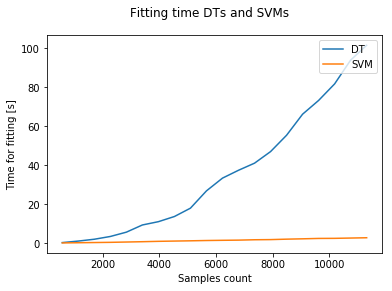

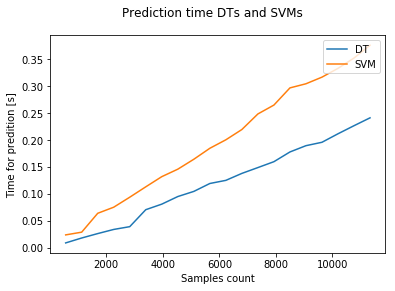

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from imports.matrix_helper import MatrixHelper
from imports.prediction_helper import PredictionHelper
from sklearn.metrics import precision_recall_curve

matrix_helper = MatrixHelper()

# Read pickle
matrices = matrix_helper.load_from_parse('data/matrices/matrix_cla_incl_current.pickle')

experiments_count = 20
time_fitting_list_dt = []
time_fitting_list_svm = []
time_predicting_list_dt = []
time_predicting_list_svm = []
relevant_samples = []

for model in ['DT', 'LinearSVC']:
    for i in range(experiments_count):
        relevant = int((matrices[0].shape[0] / float(experiments_count)) * (i + 1))
        # Instantiate Prediction Helper Class and calculate prediction
        prediction_helper = PredictionHelper()
        prediction_helper.calculate_validation_compare_matrix(matrices, sampling_factor=(2.0/3), model_type=model, crop_matrix=relevant)
        compare_matrix = prediction_helper.get_compare_matrix()

        # Compute Precision-Recall
        precision, recall, thresholds = precision_recall_curve(np.array(compare_matrix[:, 2], dtype='f'), np.array(compare_matrix[:, 1], dtype='f'))
        
        if model == 'DT':
            relevant_samples.append((2.0/3) * relevant)
            time_fitting_list_dt.append(prediction_helper.time_fitting)
            time_predicting_list_dt.append(prediction_helper.time_predicting)
        else:
            time_fitting_list_svm.append(prediction_helper.time_fitting)
            time_predicting_list_svm.append(prediction_helper.time_predicting)
        print('{} Calculation {}/{}'.format(model, i+1, experiments_count))
    
figure_time_fitting = plt.figure()

plt.xlabel('Samples count')
plt.ylabel('Time for fitting [s]')
figure_time_fitting.suptitle('Fitting time DTs and SVMs')
dt, = plt.plot(relevant_samples, time_fitting_list_dt, label="DT")
svm, = plt.plot(relevant_samples, time_fitting_list_svm, label="SVM")
plt.legend(handles=[dt, svm], loc=1)

figure_time_predicting = plt.figure()

plt.xlabel('Samples count')
plt.ylabel('Time for predition [s]')
figure_time_predicting.suptitle('Prediction time DTs and SVMs')
dt, = plt.plot(relevant_samples, time_predicting_list_dt, label="DT")
svm, = plt.plot(relevant_samples, time_predicting_list_svm, label="SVM")
plt.legend(handles=[dt, svm], loc=1)

figure_time_fitting.savefig('outputs/dt-vs-svm-time_fitting.pdf')
figure_time_predicting.savefig('outputs/dt-vs-svm-time_predicting.pdf')

### Präzisionsunterschiede in der Klassifikation mit DT vs. SVM
* Matrix: Klassifikationsmatrix auf aktuellem Stand "current" des mozilla-central Repository
* Features: Includes
* Modell: Support Vector Machine Classifier, Decision Tree Classifier

#### Setup
* Training-Set/Test-Set: Stratified sampling auf der Matrix (2/3 : 1/3)

#### Results
Das Skript trainiert 40 mal je einen SVM- und einen DT-Classifier und berechnet anschliessend Precision und Recall.
* Resultat Plot: Die Scatterplots zeigen Precision gegen Recall für DTs und SVMs bei n=40 Experimenten

DT Calculation 1/40
DT Calculation 2/40
DT Calculation 3/40
DT Calculation 4/40
DT Calculation 5/40
DT Calculation 6/40
DT Calculation 7/40
DT Calculation 8/40
DT Calculation 9/40
DT Calculation 10/40
DT Calculation 11/40
DT Calculation 12/40
DT Calculation 13/40
DT Calculation 14/40
DT Calculation 15/40
DT Calculation 16/40
DT Calculation 17/40
DT Calculation 18/40
DT Calculation 19/40
DT Calculation 20/40
DT Calculation 21/40
DT Calculation 22/40
DT Calculation 23/40
DT Calculation 24/40
DT Calculation 25/40
DT Calculation 26/40
DT Calculation 27/40
DT Calculation 28/40
DT Calculation 29/40
DT Calculation 30/40
DT Calculation 31/40
DT Calculation 32/40
DT Calculation 33/40
DT Calculation 34/40
DT Calculation 35/40
DT Calculation 36/40
DT Calculation 37/40
DT Calculation 38/40
DT Calculation 39/40
DT Calculation 40/40
LinearSVC Calculation 1/40
LinearSVC Calculation 2/40
LinearSVC Calculation 3/40
LinearSVC Calculation 4/40
LinearSVC Calculation 5/40
LinearSVC Calculation 6/40
LinearS

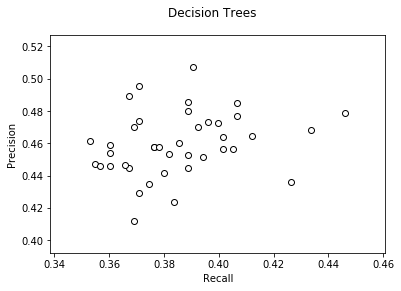

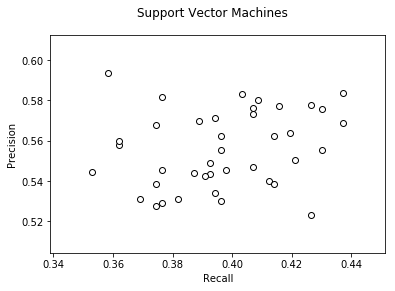

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

from imports.matrix_helper import MatrixHelper
from imports.prediction_helper import PredictionHelper
from sklearn.metrics import precision_recall_curve

matrix_helper = MatrixHelper()
experiments_count = 40

# Read pickle
matrices = matrix_helper.load_from_parse('data/matrices/matrix_cla_incl_current.pickle')

precision_list_dt = []
precision_list_svm = []
recall_list_dt = []
recall_list_svm = []
time_list_dt = []
time_list_svm = []

for model in ['DT', 'LinearSVC']:
    for i in range(experiments_count):
        # Instantiate Prediction Helper Class and calculate prediction
        prediction_helper = PredictionHelper()
        prediction_helper.calculate_validation_compare_matrix(matrices, sampling_factor=(2.0/3), model_type=model)
        compare_matrix = prediction_helper.get_compare_matrix()

        # Compute Precision-Recall
        precision, recall, thresholds = precision_recall_curve(np.array(compare_matrix[:, 2], dtype='f'), np.array(compare_matrix[:, 1], dtype='f'))

        if model == 'DT':
            precision_list_dt.append(precision[1])
            recall_list_dt.append(recall[1])
            time_list_dt.append(prediction_helper.time_fitting)
        else:
            precision_list_svm.append(precision[1])
            recall_list_svm.append(recall[1])
            time_list_svm.append(prediction_helper.time_fitting)
        print('{} Calculation {}/{}'.format(model, i+1, experiments_count))
    


# plot
figure_precision = plt.figure()
plt.scatter(recall_list_dt, precision_list_dt, edgecolor='black', linewidth='1', facecolor='white')
figure_precision.suptitle('Decision Trees')
plt.xlabel('Recall')
plt.ylabel('Precision')

figure_recall = plt.figure()
plt.scatter(recall_list_svm, precision_list_svm, edgecolor='black', linewidth='1', facecolor='white')
figure_recall.suptitle('Support Vector Machines')
plt.xlabel('Recall')
plt.ylabel('Precision')


figure_precision.savefig('outputs/dt-vs-svm-precision.pdf')
figure_recall.savefig('outputs/dt-vs-svm-recall.pdf')


# create table
precision_average_dt = "{:.2f}".format(sum(precision_list_dt) / float(len(precision_list_dt)))
precision_average_svm = "{:.2f}".format(sum(precision_list_svm) / float(len(precision_list_svm)))
recall_average_dt = "{:.2f}".format(float(sum(recall_list_dt)) / len(recall_list_dt))
recall_average_svm = "{:.2f}".format(float(sum(recall_list_svm)) / len(recall_list_svm))
time_average_dt = "{:.2f}min".format((float(sum(time_list_dt)) / len(time_list_dt)) / 60.0)
time_average_svm = "{:.2f}min".format((float(sum(time_list_svm)) / len(time_list_svm)) / 60.0)

table = PrettyTable(['Classifier', 'Precision', 'Recall', 'time for fitting'])
table.align["Classifier"] = "l"
table.add_row(['Support Vector Machine', precision_average_svm, recall_average_svm, time_average_svm])
table.add_row(['Decision Tree', precision_average_dt, recall_average_dt, time_average_dt])

# print
print('+------------------------------------+')
print('| Average of {:3} Experiments:        |'.format(experiments_count))
print(table)

